In [10]:
import cortex

In [15]:
from nilearn import surface
from tqdm import tqdm_notebook
import numpy as np
from nibabel import gifti
import os.path as op

In [16]:
masks = cortex.utils.get_roi_verts('fsaverage', mask=True)

(pts_l, poly_l), (pts_r, poly_r) = cortex.db.get_surf('fsaverage', 'pia')
nlverts = len(pts_l)

derivatives = '/data/risk_precision/ds-numrisk/derivatives/'
for key in masks:
    print(key)
    
    rh = gifti.GiftiImage(darrays=[gifti.GiftiDataArray(masks[key][nlverts:].astype(float))])    
    rh.to_filename(op.join(derivatives, 'surface_masks', f'desc-{key}_space-fsaverage_hemi-rh.label.gii'))

NF2_R
NF1_R
NINS_R
weighted_mu
R2
NTO
NPC2_R
NPC3_R
NPC1_r


In [20]:
dist_matrix

array([[ 0.        , 39.80417532, 24.44184715, ...,  8.31907782,
         8.8440614 ,  9.46624237],
       [39.64838889,  0.        , 18.42185525, ..., 37.83272664,
        39.16630414, 40.20491577],
       [24.74051618, 18.80743348,  0.        , ..., 30.05917543,
        31.09451823, 31.96264317],
       ...,
       [ 9.08148906, 38.59095348, 29.78800847, ...,  0.        ,
         0.92135905,  1.79904122],
       [ 9.67385171, 40.36342321, 31.21547927, ...,  1.38924504,
         0.        ,  0.51479028],
       [10.31576171, 41.50722439, 32.20575698, ...,  2.4484896 ,
         1.08591155,  0.        ]])

In [30]:
(pts_l, poly_l), (pts_r, poly_r) = cortex.db.get_surf('fsaverage6', 'pia')
surf = cortex.polyutils.Surface(pts_r, poly_r)
    
for mask_str in ['NPC1', 'NPC2', 'NPC3', 'NF1', 'NF2', 'NTO']:

    mask = surface.load_surf_data(f'/data/risk_precision/ds-numrisk/derivatives/surface_masks/desc-{mask_str}_R_space-fsaverage6_hemi-rh.label.gii')
    mask = mask.astype(bool)

    ss = surf.create_subsurface(mask)
    dist_matrix = np.zeros((len(ss.pts), len(ss.pts)))
    for i in tqdm_notebook(range(len(dist_matrix))):
        dist_matrix[i] = ss.geodesic_distance(i)
        
    im = gifti.GiftiImage(darrays=[gifti.GiftiDataArray(d) for d in dist_matrix.astype(np.float32)])
    im.to_filename(op.join(derivatives, 'surface_masks', f'desc-distance_matrix-{mask_str}-R_space-fsaverage6_hemi-rh.gii'))

/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [35]:
import seaborn as sns

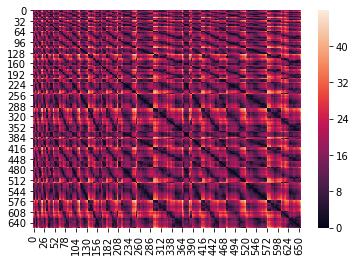

In [36]:
sns.heatmap(s)